# Data Manipulation with pandas
----
## Transforming DataFrames
----

### Introducing Dataframes
**Pandas** is built on Numpy and Matplotlib. It is used to work with rectangular (tabular) data that in pandas are called Dataframes. Every value within a column has the same data type but differnt columns can have different data types.

To quickly explore a dataframe, pandas has several methods: 
1. **.head():** returns the first few rows in a Dataframe
2. **.info():** displays the names of the columns, the data type and if they have any missing values.  
3. **.shape** will display the rows and colums as **(#rows, #colums)**. **Note:** *this is an attribute so we do not write the parentheses*
4. **.describe():** compute some summary statistics for numerical columns 

Dataframes  consist of three components, stored as attributes:
1. **.values:** A two-dimensional NumPy array of values.
2. **.columns:** An index of columns: the column names.
3. **.index:** An index for the rows: either row numbers or row names.

In [2]:
import pandas as pd 
homelessness = pd.read_csv("Datasets\homelessness.csv")

# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop  
0    4887681  
1     735139  
2    7158024  
3    3009733  
4   39461588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 

### Sorting and subsetting

#### Sorting 
Change the order of the rows `.sort_values("column_name_to_sort_by")`. 
- Setting the argument ascending=False will sort the data descending. 
- It is possible to sort by different columns `.sort_values(["first_column_name_to_sort_by", "second_column_name_to_sort_by"])`. The dataframe will be sorted by the first stated column and then the second, ... 

#### Subsetting 
To zoom in over just one column we will use `dataframe_name["column_name"]`. 
- To select multuple columns we need to use 2 sets of brackets: `dataframe_name[["first_column_name", "second_column_name"]]`. 
  - The out square brackets are responsible for subsetting the dataframe `dataframe["cols_to_subset"]`
  - the in square brackets are creating a list of columns names to subset `cols_to_subset["column1", "column2]`



In [3]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
print(homelessness_ind.head())

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

# Print the top few rows
print(homelessness_fam.head())

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending = [True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

    Unnamed: 0              region         state  individuals  family_members  \
50          50            Mountain       Wyoming        434.0           205.0   
34          34  West North Central  North Dakota        467.0            75.0   
7            7      South Atlantic      Delaware        708.0           374.0   
39          39         New England  Rhode Island        747.0           354.0   
45          45         New England       Vermont        780.0           511.0   

    state_pop  
50     577601  
34     758080  
7      965479  
39    1058287  
45     624358  
    Unnamed: 0              region          state  individuals  \
32          32        Mid-Atlantic       New York      39827.0   
4            4             Pacific     California     109008.0   
21          21         New England  Massachusetts       6811.0   
9            9      South Atlantic        Florida      21443.0   
43          43  West South Central          Texas      19199.0   

    family_members  

In [4]:
# Select the individuals column
individuals = homelessness["individuals"]

# Print the head of the result
print(individuals.head())

# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head())

# Select only the individuals and state columns, in that order
ind_state = homelessness[["individuals", "state"]]

# Print the head of the result
print(ind_state.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64
        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0
   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


In [5]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
print(ind_gt_10k)

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"] == 'Mountain']

# See the result
print(mountain_reg)

# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
print(fam_lt_1k_pac)

    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


In [9]:
# Subsetting rows by categorical variables

# METHOD 1
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic_method_1 = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic")]

# See the result
print(south_mid_atlantic_method_1)

# METHOD 2
south_mid_atlantic_method_2 = ["South Atlantic", "Mid-Atlantic"]
condition = homelessness["region"].isin(south_mid_atlantic_method_2)
print(homelessness[condition])

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   
30          30    Mid-Atlantic            New Jersey       6048.0   
32          32    Mid-Atlantic              New York      39827.0   
33          33  South Atlantic        North Carolina       6451.0   
38          38    Mid-Atlantic          Pennsylvania       8163.0   
40          40  South Atlantic        South Carolina       3082.0   
46          46  South Atlantic              Virginia       3928.0   
48          48  South Atlantic         West Virginia       1021.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9     

In [11]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


### New Colums
You can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.Also, you can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.


In [13]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
print(homelessness.head())

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop     total  p_individuals  
0    4887681    3434.0       0.748398  
1     735139    2016.0       0.711310  
2    7158024    9865.0       0.735834  
3    3009733    2712.0       0.840708  
4   39461588  129972.0       0.838704  


In [14]:
# Which state has the highest number of homeless individuals per 10,000 people in the state?

# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## Aggregating Dataframes
----
### Summary statistics
Numbers that summarize and tell you about your dataset. For example, mean, median, minimum, maximum, and standard deviation. To use them only select the column of the dataframe using [] and use one of the following methods: 
- .mean()
- .median()
- .mode()
- .min()
- .max()
- .var()
- .std()
- .sum()
- .quantile()

Example: `dataframe["column_name"].mean()`

>**Note:** you can apply this methods to numeric and date columns (The date type should be datetime64). 

**Additional usefull methods**
- .agg()
- .cumsum(): Calculates the cumulative sum of the rows. 
- .cummax()
- .cummin()
- .cumprod()

In [2]:
import pandas as pd
sales = pd.read_csv("Datasets\sales_subset.csv")

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())

# Print the maximum of the date column
print(sales["date"].max())

# Print the minimum of the date column
print(sales["date"].min())



   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

#### The .agg() method: Efficient summaries

The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. 

`df['column'].agg(function)`

In [ ]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

### Counting: Summarizing categorical data
1. Droping duplicated values in only 1 column or multiple columns: `dataframe.drop_duplicates(subset="column_name")` or `dataframe.drop_duplicates(subset=["column_name_1", "column_name_2")`
2. Counting the values in a column: `dataframe["column_name"].value_counts()`. 
   1. The sort parameter can be added to order the data based on the count result `dataframe["column_name"].value_counts(sort=True)`
   2. The normalize parameter can be used to get the results as a proportion of the total `dataframe["column_name"].value_counts(normalize=True)`


In [3]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"] == True].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates["date"])

# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

### Grouped summary statistics
There are 2 ways of groupingdata to calculate statistics: 
1. By subsetting the databse on the conditions we need. 
2. Using the `.groupby()` method.

In [4]:
import pandas as pd
sales = pd.read_csv("Datasets\sales_subset.csv")

# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [ ]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales["weekly_sales"])
print(sales_propn_by_type)

# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

In [8]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment","fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


### Pivot tables
the `.pivot_table()` method is an alternative to `.groupby()`

#### Structure of the .pivot_table() method 
`datframe.pivot_table(values='column_to_calculate', index='column_to_group_by_in_row', columns='column_to_group_by_columns', fill_value=0, margins=True)`

**Parameters:**
- values: columns in which we want to make the calculations
- index: columns to group by as rows
- columns: columns to group by as columns
- aggfunc: the default calculation will be the mean. To calculate other statistic we need to specify it using the aggfunc parameter. 
- fill_value: by default when there is no data the pivot table will be filled with NaN. To change it we will use the fill_value method. It replaces missing values with a real value (known as imputation). 
- margins: is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [8]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=[np.median, np.mean])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

    # The column 'All' returns an overall mean for each department, not (A+B)/2

      weekly_sales
type              
A     23674.667242
B     25696.678370
           median          mean
     weekly_sales  weekly_sales
type                           
A        11943.92  23674.667242
B        13336.08  25696.678370
is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500
type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]
type                   A              B           All
department

## Slicing and Indexing Dataframes
----
### Explicit indexes 
- Setting a columns as index: `df.set_index("column_name")`
- Removing an index: `df.reset_index()`. Reset_index() has a parameter drop that will completely remove the index column when set to True (`df.reset_index(drep=True)`).

**Why to use indexes?**
It makes subsetting simpler. 
**Example:** 
- Without name as index: `df[df["name"].isin(["Stella", "Bella"])]`
- with name as index: `df.loc[["Stella", "Bella"]]`

#### Multi-level Indexes (Hierarchical Indexes)
Several columns can be set as indexes at the same time by adding the columns in the set index method. 
**Example:** `df.set_index("column_1", "column_2")`

**Subsetting multi-level indexes**
- To subset the outer level we will use a list: `df.loc[["labrador", "chihuahua"]]`
- To subset inner levels we will need a list of tuples: `df.loc[[("labrador", "brown"), ("chihuahua", "tan")]]`

#### Sorting by index values
`df.sort_index()` will sort the values in ascending order by the index value from outer to inner. This order can be controlled: `df.sort_index(level=["column_1", "column_2"], asceding=[True,False])`




In [14]:
import pandas as pd
temperatures = pd.read_csv("Datasets/temperatures.csv")
print(temperatures)

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]


In [ ]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

In [ ]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

In [9]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


In [10]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True,False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

### Slicing and subsetting with .loc and .iloc
To slice a database it is necesarry that we sort the values index first: `df.set_index(["column_1", "column_2"]).sort_index()`. 

#### Slice the outer index level
To slice the outer index level we will use `.loc[]`. Example: `df.loc["Chow Chow":"Poodle"]` (the final value is included).

#### Slice the inner index levels
To slice the inner index levels we will use the `.loc[]` fuction as well. However, the first ans last positions will be passed as tuples. Example: `df.loc[("Labrador","Brown"):("Schnauzer", "Grey")]`

#### Slicing columns
The syntaxis is the same `df.loc[rows, columns]`.  
- To get all rows and some columns: `df.loc[:, "column_start":"column_end"]`.
- To slice on rows and columns at the same time: `df.loc[("Labrador","Brown"):("Schnauzer", "Grey"), "name":"height_cm"]`.

#### Subsetting by row / column number
To do this we will use the `.iloc[rows, column]`. 

In [ ]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan": "Russia"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"): ("Russia", "Moscow")])

# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, "date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])

In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

In [ ]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])

### Working with pivot tables


In [ ]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country", "city"], columns="year")

# See the result
print(temp_by_country_city_vs_year)


In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India", "Delhi")]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India", "Delhi"), "2005":"2010"]

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

## Creating and Visualizing DataFrames
-----
### Visualizing your data
To be able to diplay our visualizations we will need to import pyplot from matplotlib: 

`import matplotlib.pyplot as plt` 

#### Types of plots
| Histograms | Bar plot | Line plot | Scatter plot |
| ---------- | -------- | ---------- | ---------- | 
|  | Reveal relationships between a categorical variable and a numeric variable | Line plots are great for visualizing changes in numeric variables over time | Scatter plots are great for visualizing relationships between two numeric variables | 

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


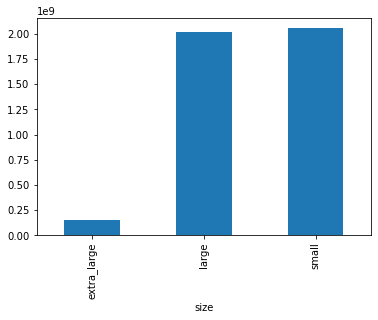

In [1]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import pandas as pd

avocados = pd.read_pickle("Datasets/avoplotto.pkl")

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x="date", y="nb_sold", kind='line', rot=45)
    # rot will rotate the lables in X axis

# Show the plot
plt.show()

In [ ]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", kind='scatter', title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

In [ ]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### Missing values
in a pandas Dataframe, the missing values are indicated by NaN (Not a Number).  
- To idenfify the missing values we can use the isna() method as follows: `df.isna()`. The result will be a dataframe with booleans identifing value = NaN. 
- For a better view of the missing values we can add the .any() method `df.isna().any()`. The result will list of booleans that identify columns that have at least one NaN 
- `df.isna().sum()` will provide the count of missing values.

#### What can we do with missing values? 

1. **Removing the missing values**
To remove the missing values we can us `df.dropna()`. This will delete all the rows that have NaN values. 

2. **Replacing the missing values**
We can replace the missing values with a value using `df.fillna(value)`. 

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


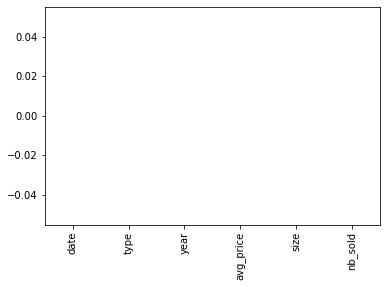

In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

avocados_2016 = avocados[(avocados["date"] > "2016-01-01") & (avocados["date"] < "2017-01-01")]
avocados_2016

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()
plt.show()

# Show the plot
plt.show()

### Creating DataFrames

Dictionaries:

```python
my_dict = {
    "key1": value1,
    "key2": value2,
    "key3": value3
}
```
To access values in a dictionary, use [] `my_dict["key1"]`.  

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"	],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

### Reading and Writing CSV
CSV (Comma-separated values) is a common data storage type designed to store tabular data. 
- To import data from a csv we will use `df.read_csv("file_path/file.csv")`
- To convert a DataFramse into a CSV we will use `df.to_csv("new_file_name.csv")`